In [1]:
# !pip install interpret
# !pip install --user xgboost
# !pip install pytorch-tabnet
# !pip install anchor-exp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from interpret import preserve, show
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=42

In [3]:
dataset_folder = 'dataset/HGSORF_CSection/'

In [4]:
df=pd.read_csv(dataset_folder + 'train_COMBO.csv')
df.replace(to_replace=' ',value=np.nan,inplace=True)
#df.drop(columns=['Unnamed: 0'],inplace=True)
df1=pd.read_csv(dataset_folder + 'test_COMBO.csv')
df1.replace(to_replace=' ',value=np.nan,inplace=True)
#df1.drop(columns=['Unnamed: 0'],inplace=True)
x_train=df.drop(columns=['Last_Birth_a_Caesarean_Section'])
y_train=df['Last_Birth_a_Caesarean_Section']
x_test=df1.drop(columns=['Last_Birth_a_Caesarean_Section'])
y_test=df1['Last_Birth_a_Caesarean_Section']

In [5]:
df_main=pd.concat([df,df1],axis=0)
df_main

,Age_of_Mother,Type_of_place_of_residence,Mothers_Education,Number_of_household_members_,Total_children_ever_born,Births_in_last_five_years,Number_of_living_children,Ever_had_a_terminated_pregnancy,Sources_of_Drinking_Water,Household_Toilet_Facility,...,Smoker,Husbands_Education,Husbands_Occupations,Mothers_Occupation,Decision_Making_Power_on_Delivery_Palce,Suffered_by_Domestic_Violence,Number_of_ANC_Visits,Had_Previous_C-section,Size_of_child_at_birth,Last_Birth_a_Caesarean_Section
0,27,1,1,10,2,2,2,1,0,0,...,0,2,4,0,2,1,2,0,3,0
1,32,2,0,8,6,2,4,0,1,0,...,0,1,4,0,1,1,1,1,4,1
2,37,1,2,7,5,1,5,0,1,1,...,0,2,3,0,1,0,8,1,3,1
3,29,2,1,14,6,2,3,0,1,1,...,0,0,4,0,1,0,2,0,3,0
4,31,2,0,5,3,3,3,0,0,0,...,0,2,4,0,1,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,27,2,0,24,6,2,5,0,0,1,...,0,2,3,0,3,0,3,0,3,0
7882,21,1,2,4,1,1,1,0,1,1,...,0,2,4,0,1,0,8,1,3,1
7883,35,2,0,8,7,1,6,0,1,0,...,0,2,1,0,1,0,0,0,3,0
7884,24,1,1,17,1,1,1,0,1,1,...,0,2,3,0,1,0,4,1,3,1


In [6]:
x=df_main.drop(columns=['Last_Birth_a_Caesarean_Section'])
y=df_main['Last_Birth_a_Caesarean_Section']

In [7]:
df

,Age_of_Mother,Type_of_place_of_residence,Mothers_Education,Number_of_household_members_,Total_children_ever_born,Births_in_last_five_years,Number_of_living_children,Ever_had_a_terminated_pregnancy,Sources_of_Drinking_Water,Household_Toilet_Facility,...,Smoker,Husbands_Education,Husbands_Occupations,Mothers_Occupation,Decision_Making_Power_on_Delivery_Palce,Suffered_by_Domestic_Violence,Number_of_ANC_Visits,Had_Previous_C-section,Size_of_child_at_birth,Last_Birth_a_Caesarean_Section
0,27,1,1,10,2,2,2,1,0,0,...,0,2,4,0,2,1,2,0,3,0
1,32,2,0,8,6,2,4,0,1,0,...,0,1,4,0,1,1,1,1,4,1
2,37,1,2,7,5,1,5,0,1,1,...,0,2,3,0,1,0,8,1,3,1
3,29,2,1,14,6,2,3,0,1,1,...,0,0,4,0,1,0,2,0,3,0
4,31,2,0,5,3,3,3,0,0,0,...,0,2,4,0,1,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,30,1,3,5,4,2,4,1,1,1,...,0,3,3,1,0,0,9,0,3,0
18394,30,2,0,8,4,2,4,0,1,1,...,0,0,4,0,2,1,3,0,3,0
18395,24,1,2,11,2,2,2,0,1,1,...,0,3,2,0,2,1,6,1,3,1
18396,23,2,0,13,4,3,3,0,1,0,...,0,0,4,1,2,1,0,0,4,0


In [8]:
df1

,Age_of_Mother,Type_of_place_of_residence,Mothers_Education,Number_of_household_members_,Total_children_ever_born,Births_in_last_five_years,Number_of_living_children,Ever_had_a_terminated_pregnancy,Sources_of_Drinking_Water,Household_Toilet_Facility,...,Smoker,Husbands_Education,Husbands_Occupations,Mothers_Occupation,Decision_Making_Power_on_Delivery_Palce,Suffered_by_Domestic_Violence,Number_of_ANC_Visits,Had_Previous_C-section,Size_of_child_at_birth,Last_Birth_a_Caesarean_Section
0,32,1,2,14,3,2,3,0,0,0,...,0,2,4,0,1,0,6,1,3,1
1,28,1,0,18,6,2,6,0,1,1,...,0,1,4,0,2,0,1,0,3,0
2,24,2,0,4,3,2,2,0,1,1,...,0,2,4,0,1,1,0,0,3,0
3,33,1,0,24,5,1,5,0,1,1,...,0,2,2,0,2,1,2,0,3,0
4,24,2,1,10,2,1,2,0,1,1,...,0,0,4,0,3,1,4,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,27,2,0,24,6,2,5,0,0,1,...,0,2,3,0,3,0,3,0,3,0
7882,21,1,2,4,1,1,1,0,1,1,...,0,2,4,0,1,0,8,1,3,1
7883,35,2,0,8,7,1,6,0,1,0,...,0,2,1,0,1,0,0,0,3,0
7884,24,1,1,17,1,1,1,0,1,1,...,0,2,3,0,1,0,4,1,3,1


In [9]:
x_test.shape

(7886, 24)

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age_of_Mother                            18398 non-null  int64  
 1   Type_of_place_of_residence               18398 non-null  int64  
 2   Mothers_Education                        18398 non-null  int64  
 3   Number_of_household_members_             18398 non-null  int64  
 4   Total_children_ever_born                 18398 non-null  int64  
 5   Births_in_last_five_years                18398 non-null  int64  
 6   Number_of_living_children                18398 non-null  int64  
 7   Ever_had_a_terminated_pregnancy          18398 non-null  int64  
 8   Sources_of_Drinking_Water                18398 non-null  int64  
 9   Household_Toilet_Facility                18398 non-null  int64  
 10  Reading_Newspaper_or_Magazine            18398

# ML Model

In [11]:
import sklearn.metrics
import pandas as pd
import time
import numpy as np

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from interpret.glassbox import ExplainableBoostingClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [13]:
random_state=42

In [14]:
x_train

,Age_of_Mother,Type_of_place_of_residence,Mothers_Education,Number_of_household_members_,Total_children_ever_born,Births_in_last_five_years,Number_of_living_children,Ever_had_a_terminated_pregnancy,Sources_of_Drinking_Water,Household_Toilet_Facility,...,Mothers_BMI,Smoker,Husbands_Education,Husbands_Occupations,Mothers_Occupation,Decision_Making_Power_on_Delivery_Palce,Suffered_by_Domestic_Violence,Number_of_ANC_Visits,Had_Previous_C-section,Size_of_child_at_birth
0,27,1,1,10,2,2,2,1,0,0,...,27.650000,0,2,4,0,2,1,2,0,3
1,32,2,0,8,6,2,4,0,1,0,...,25.450000,0,1,4,0,1,1,1,1,4
2,37,1,2,7,5,1,5,0,1,1,...,31.023793,0,2,3,0,1,0,8,1,3
3,29,2,1,14,6,2,3,0,1,1,...,20.548000,0,0,4,0,1,0,2,0,3
4,31,2,0,5,3,3,3,0,0,0,...,23.000000,0,2,4,0,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,30,1,3,5,4,2,4,1,1,1,...,29.116000,0,3,3,1,0,0,9,0,3
18394,30,2,0,8,4,2,4,0,1,1,...,22.678000,0,0,4,0,2,1,3,0,3
18395,24,1,2,11,2,2,2,0,1,1,...,23.626742,0,3,2,0,2,1,6,1,3
18396,23,2,0,13,4,3,3,0,1,0,...,22.150000,0,0,4,1,2,1,0,0,4


In [15]:
def classify_report(clfs, dataset):
    x_train, y_train, x_test, y_test = dataset
    data = []
    for clf, name, no_df in clfs:
        if no_df:
            x_tr, x_te = x_train, x_test
        else:
            x_tr, x_te = x_train.values,  x_test.values
        clf.fit(x_tr, y_train)
        pred = clf.predict(x_te)
        f1, acc = sklearn.metrics.f1_score(y_test, pred, average='binary'), sklearn.metrics.accuracy_score(y_test, pred)
        data.append([name, f1, acc])
    df = pd.DataFrame(data, columns = ['Name', 'F1', 'Acc.'])
    df = df.sort_values(by=['F1'])
    return df

In [16]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)

clfs = [(rf, 'rf', True)]
dataset = x_train, y_train, x_test, y_test
classify_report(clfs, dataset)

,Name,F1,Acc.
0,rf,0.984698,0.98491


# RF Importance

In [17]:
selected_model = rf

class_names = ['NO','YES']
feature_names = x_train.columns.to_list()
# global = pfi, 

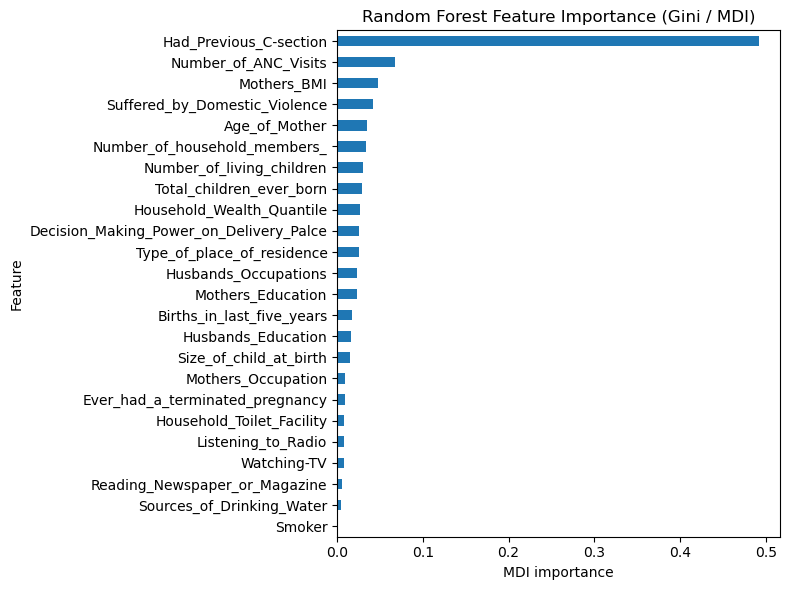

In [18]:
# If selected_model is a Pipeline, grab its final estimator for feature_importances_
final_est = getattr(selected_model, "steps", None)
final_est = final_est[-1][1] if final_est else selected_model

if not hasattr(final_est, "feature_importances_"):
    raise ValueError("Current estimator does not expose .feature_importances_ (MDI).")

gini_series = pd.Series(final_est.feature_importances_, index=feature_names)
gini_series = gini_series.sort_values(ascending=True)

ax = gini_series.plot.barh(figsize=(8, 6))
ax.set_title("Random Forest Feature Importance (Gini / MDI)")
ax.set_xlabel("MDI importance")
ax.set_ylabel("Feature")
plt.tight_layout()
# plt.savefig("figs_global_importance/focal_model_gini_importance.png", dpi=300)
plt.show()


Elapsed time to compute the importances: 2.882 seconds


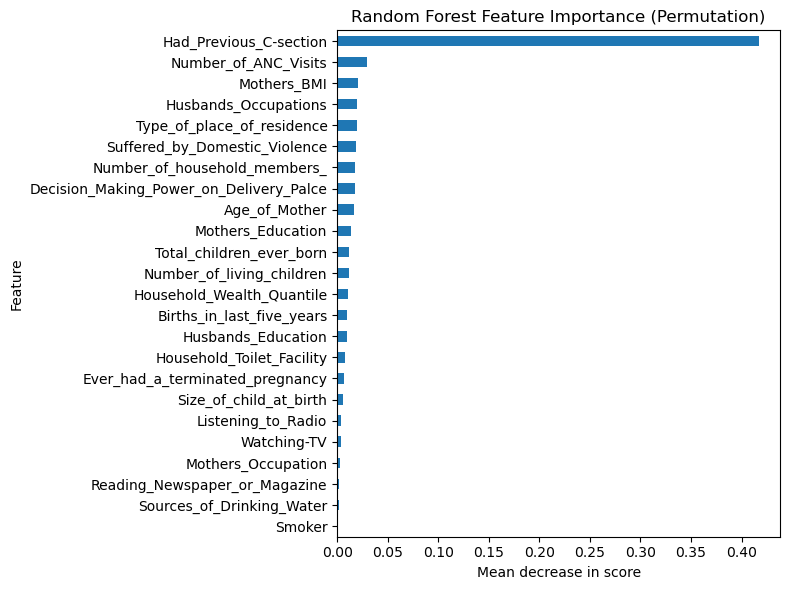

In [19]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    selected_model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

selected_model_importances = pd.Series(
    result.importances_mean, index=feature_names
).sort_values(ascending=True)

ax = selected_model_importances.plot.barh(figsize=(8, 6))
ax.set_title("Random Forest Feature Importance (Permutation)")
ax.set_xlabel("Mean decrease in score")
ax.set_ylabel("Feature")
plt.tight_layout()
# plt.savefig("figs_global_importance/focal_model_permutation_importance.png", dpi=300)
plt.show()
